In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from scipy.stats import zscore


Sieralion Data analysis

In [2]:
sierraleon_data = pd.read_csv("dataset/sierraleone-bumbuna.csv")  
sierraleon_data.shape

(525600, 19)

In [3]:
sierraleon_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
summary_stats = sierraleon_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [5]:
sierraleon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
numeric_df= sierraleon_data.select_dtypes(include='number')
negative_columns = numeric_df.columns[(numeric_df<0).any()]
print("columns with negative values are:",negative_columns)
negative_count = (numeric_df < 0).sum()
print("sum of negative values in each numeric columns:")
print(negative_count)

columns with negative values are: Index(['GHI', 'DNI', 'DHI'], dtype='object')
sum of negative values in each numeric columns:
GHI              261135
DNI              266352
DHI              263128
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [7]:

for column in ['GHI', 'DNI', 'DHI']:
    print(sierraleon_data[sierraleon_data[column] < 0][column].describe())


count    261135.000000
mean         -4.929759
std           4.292342
min         -19.500000
25%          -9.300000
50%          -2.900000
75%          -1.100000
max          -0.100000
Name: GHI, dtype: float64
count    266352.000000
mean         -0.290856
std           0.218213
min          -7.800000
25%          -0.400000
50%          -0.300000
75%          -0.100000
max          -0.100000
Name: DNI, dtype: float64
count    263128.000000
mean         -5.099848
std           4.014114
min         -17.900000
25%          -8.700000
50%          -3.800000
75%          -1.400000
max          -0.100000
Name: DHI, dtype: float64


In [8]:
# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = sierraleon_data[(sierraleon_data['GHI'] < 0) | (sierraleon_data['DNI'] < 0) | (sierraleon_data['DHI'] < 0)]
print("Outliers:\n", outliers)


Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev 

In [9]:
# Convert Timestamp to datetime
sierraleon_data['Timestamp'] = pd.to_datetime(sierraleon_data['Timestamp'])

/home/elizabeth/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


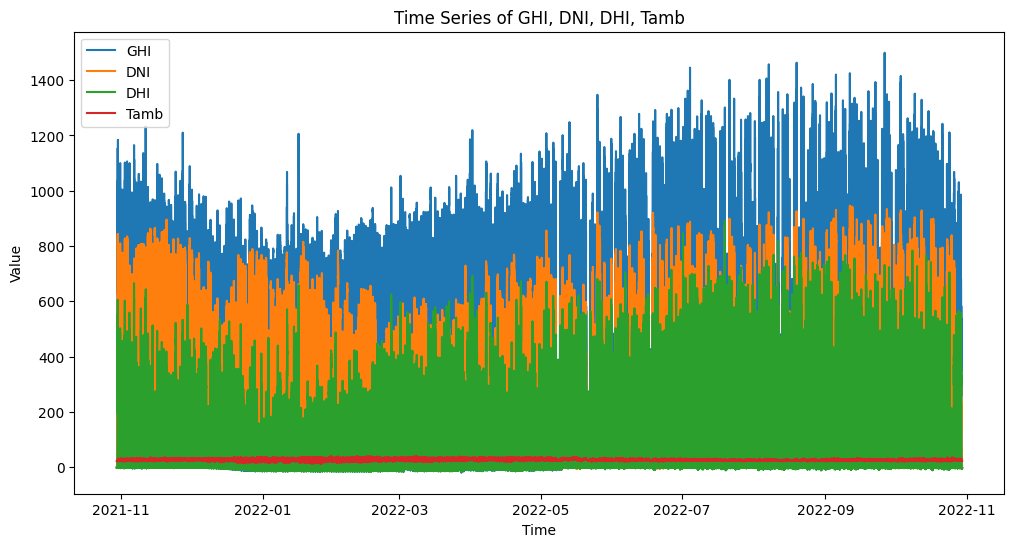

In [10]:
# Plot time series for GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
plt.plot(sierraleon_data['Timestamp'], sierraleon_data['GHI'], label='GHI')
plt.plot(sierraleon_data['Timestamp'], sierraleon_data['DNI'], label='DNI')
plt.plot(sierraleon_data['Timestamp'], sierraleon_data['DHI'], label='DHI')
plt.plot(sierraleon_data['Timestamp'], sierraleon_data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.show()

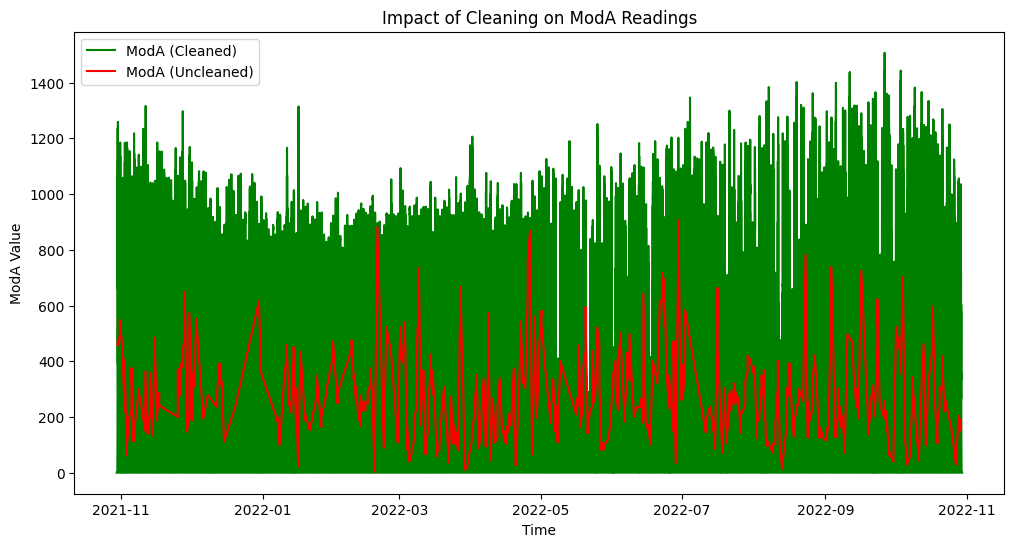

In [12]:
# Compare ModA and ModB readings before and after cleaning
cleaned_data = sierraleon_data[sierraleon_data['Cleaning'] == 0]
uncleaned_data = sierraleon_data[sierraleon_data['Cleaning'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
plt.xlabel('Time')
plt.ylabel('ModA Value')
plt.title('Impact of Cleaning on ModA Readings')
plt.legend()
plt.show()

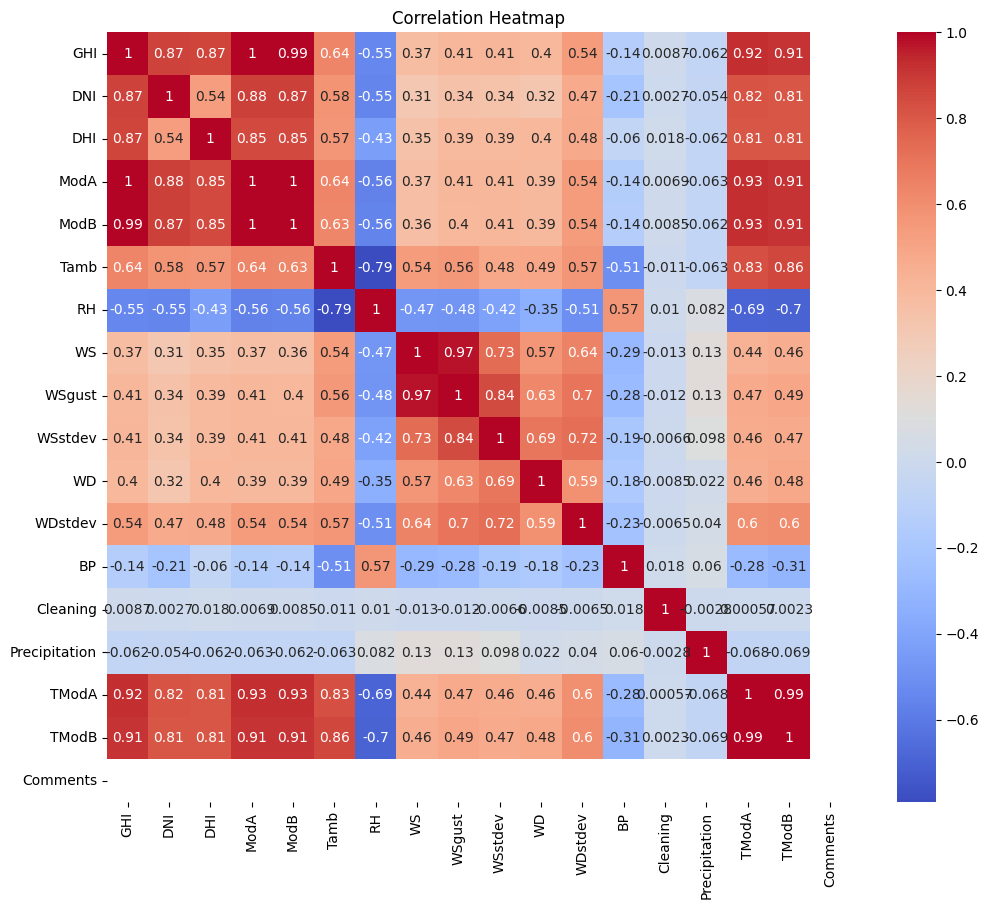

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = sierraleon_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

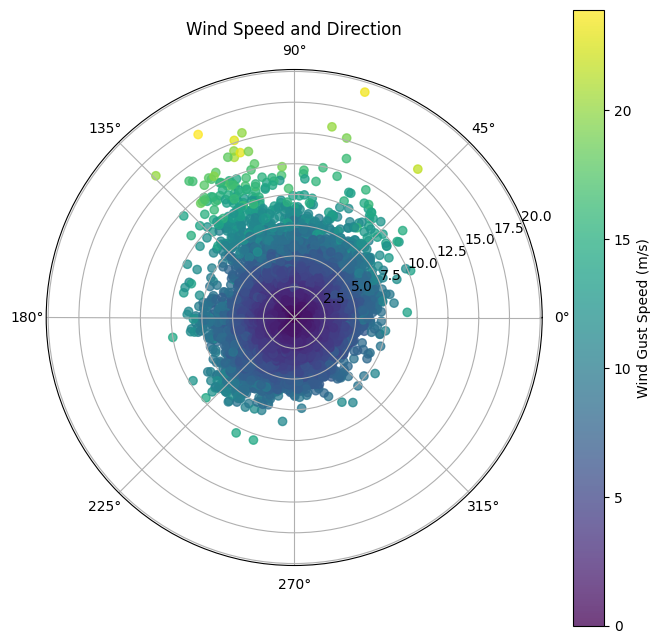

In [15]:
# Polar plot for wind speed and direction

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(sierraleon_data['WD'] * np.pi / 180, sierraleon_data['WS'], c=sierraleon_data['WSgust'], cmap=cm.viridis, alpha=0.75)
plt.colorbar(label='Wind Gust Speed (m/s)')
plt.title('Wind Speed and Direction')
plt.show()

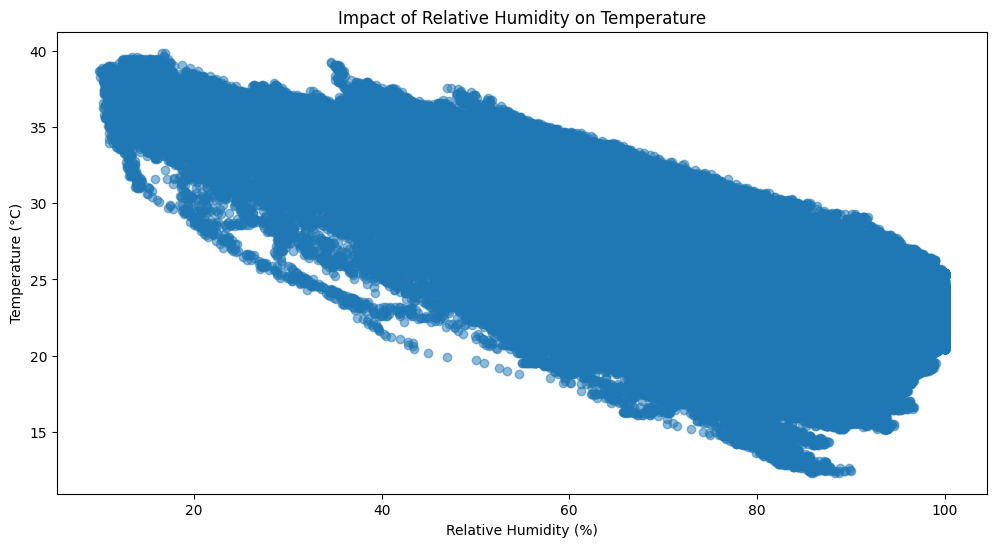

In [16]:
# Scatter plot to explore the influence of RH on temperature
plt.figure(figsize=(12, 6))
plt.scatter(sierraleon_data['RH'], sierraleon_data['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Impact of Relative Humidity on Temperature')
plt.show()

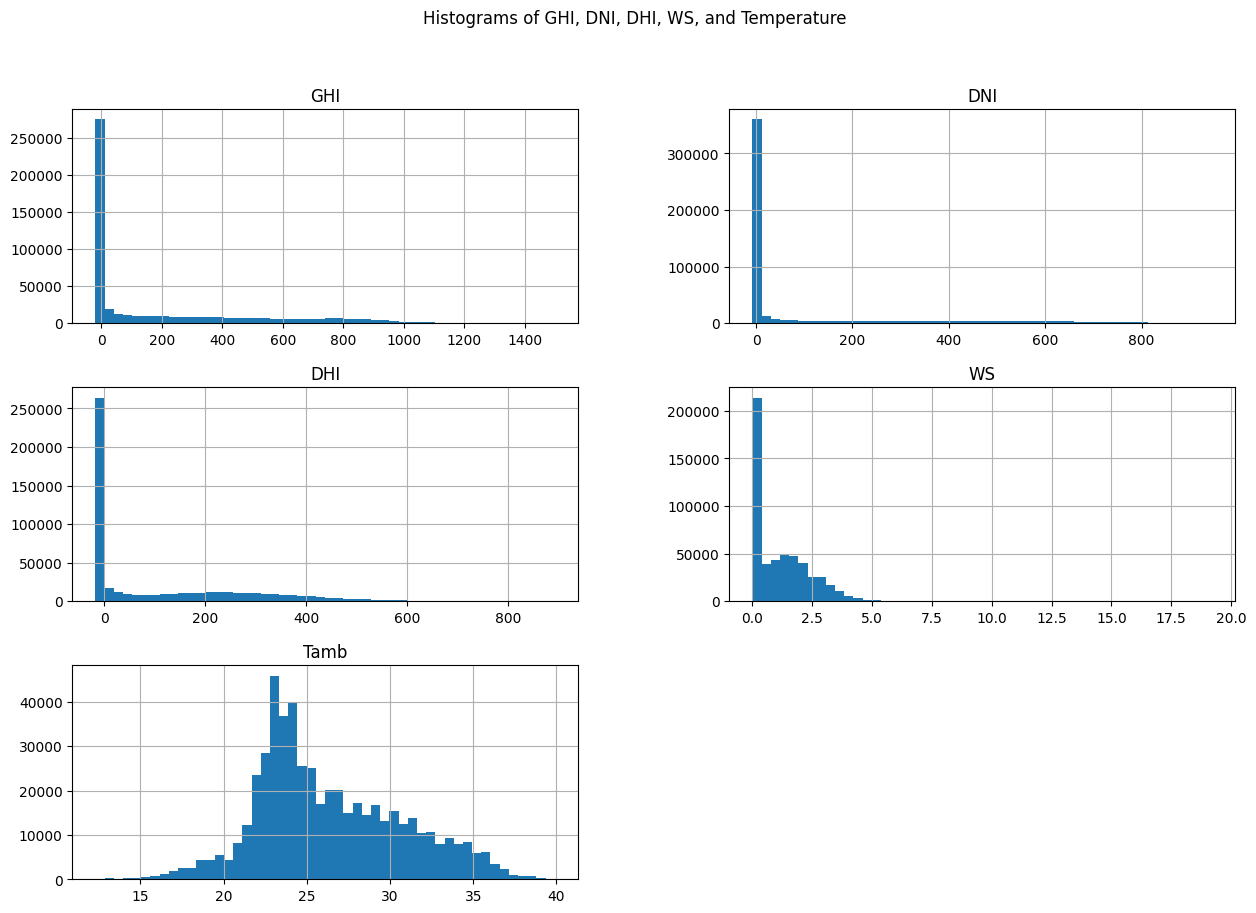

In [17]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
sierraleon_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
plt.show()

In [18]:
# Z-Score Analysis

sierraleon_data['GHI_zscore'] = zscore(sierraleon_data['GHI'])
zscore_outliers = sierraleon_data[sierraleon_data['GHI_zscore'].abs() > 3]
print("Z-Score Outliers:\n", zscore_outliers)

Z-Score Outliers:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
663    2021-10-30 11:04:00  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1   
671    2021-10-30 11:12:00  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4   
780    2021-10-30 13:01:00  1111.0  812.0  361.4  1189.0  1162.0  29.5  73.0   
781    2021-10-30 13:02:00  1126.0  815.0  373.3  1202.0  1175.0  29.7  72.4   
782    2021-10-30 13:03:00  1151.0  813.0  400.1  1226.0  1198.0  30.0  72.2   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
517747 2022-10-24 13:08:00  1134.0  674.6  497.0  1169.0  1143.0  29.9  73.8   
517748 2022-10-24 13:09:00  1162.0  715.4  487.6  1198.0  1171.0  29.9  75.8   
517749 2022-10-24 13:10:00  1163.0  730.8  475.6  1199.0  1173.0  29.9  75.0   
517750 2022-10-24 13:11:00  1125.0  698.6  467.5  1159.0  1133.0  30.1  76.5   
517823 2022-10-24 14:24:00  1109.0  762.0  470.3  1130.0  1109.0  30.6  73.1   

         WS  WSgust 

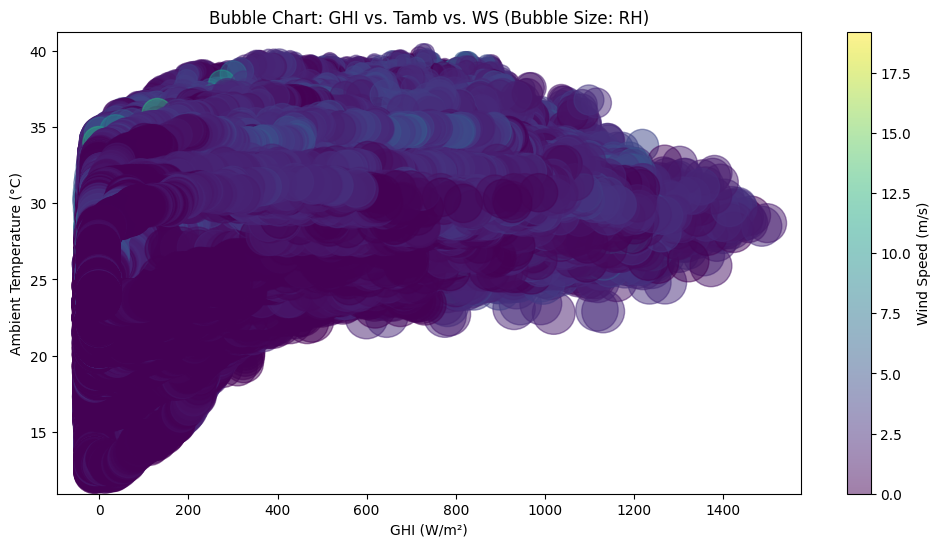

In [19]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(sierraleon_data['GHI'], sierraleon_data['Tamb'], s=sierraleon_data['RH']*10, alpha=0.5, c=sierraleon_data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
plt.show()

In [21]:
# Handle error values 

In [20]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    # Calculate the 75th percentile for negative values
    negative_values = sierraleon_data[sierraleon_data[column] < 0][column]
    if not negative_values.empty:  
        p75 = abs(negative_values.describe()['75%'])  # Get the absolute 75th percentile value
        
        # Replace the negative values with the absolute 75th percentile value
        sierraleon_data.loc[sierraleon_data[column] < 0, column] = p75
        
        print(f"Replaced negative values in '{column}' with {p75}")
    else:
        print(f"No negative values found in '{column}'")



Replaced negative values in 'GHI' with 1.1
Replaced negative values in 'DNI' with 0.1
Replaced negative values in 'DHI' with 1.4


In [22]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    if (sierraleon_data[column] < 0).any():
        print(f"Negative values still present in '{column}'.")
    else:
        print(f"No negative values in '{column}'.")


No negative values in 'GHI'.
No negative values in 'DNI'.
No negative values in 'DHI'.


In [23]:
#cleaned Data

In [ ]:
sierraleon_data.he